In [18]:
import numpy as np
import pandas as pd
import os

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [20]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [21]:
X_train = []
Y_train = []
image_size = 150
labels = ['Chickenpox', 'Measles', 'Monkeypox', 'Normal']
for i in labels:
    folderPath = os.path.join('Monkeypox Skin Image Dataset',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)


X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [22]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(770, 150, 150, 3)

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [24]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input

model = Sequential()
model.add(Input(shape=(150, 150, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 69, 69, 64)        36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 69, 69, 64)       

In [27]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [30]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.1)

Epoch 1/25
20/20 [==============================] - 2s 77ms/step - loss: 1.1058 - accuracy: 0.5698 - val_loss: 1.0156 - val_accuracy: 0.6857
Epoch 2/25
20/20 [==============================] - 2s 75ms/step - loss: 1.1055 - accuracy: 0.5859 - val_loss: 1.1543 - val_accuracy: 0.5286
Epoch 3/25
20/20 [==============================] - 2s 75ms/step - loss: 1.0786 - accuracy: 0.5682 - val_loss: 1.0296 - val_accuracy: 0.6857
Epoch 4/25
20/20 [==============================] - 2s 76ms/step - loss: 1.0965 - accuracy: 0.5586 - val_loss: 1.0316 - val_accuracy: 0.6857
Epoch 5/25
20/20 [==============================] - 2s 75ms/step - loss: 1.1051 - accuracy: 0.5602 - val_loss: 1.1804 - val_accuracy: 0.5571
Epoch 6/25
20/20 [==============================] - 2s 76ms/step - loss: 1.1169 - accuracy: 0.5666 - val_loss: 1.0870 - val_accuracy: 0.6429
Epoch 7/25
20/20 [==============================] - 2s 76ms/step - loss: 1.0570 - accuracy: 0.5682 - val_loss: 1.1080 - val_accuracy: 0.5714
Epoch 8/25
20

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

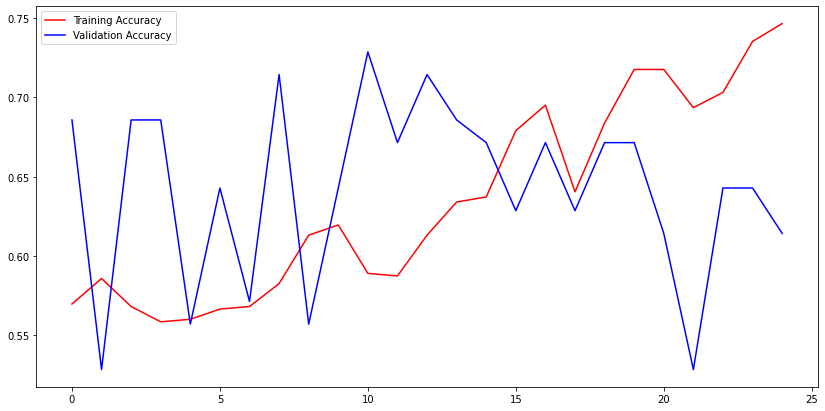

In [32]:
model.save('Monkeypox.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

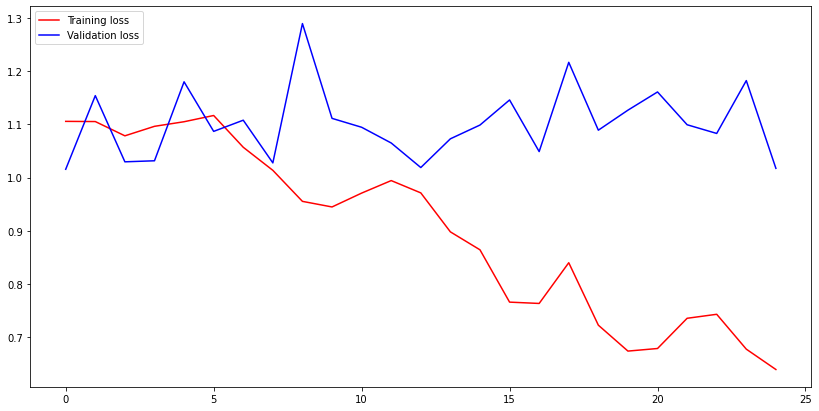

In [33]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [34]:
img = cv2.imread('Monkeypox Skin Image Dataset/Chickenpox/chickenpox1.png')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [35]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

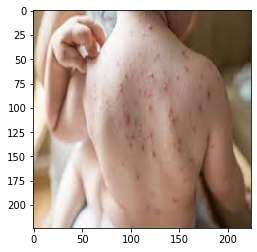

In [36]:
from tensorflow.keras.preprocessing import image
img = image.load_img('Monkeypox Skin Image Dataset/Chickenpox/chickenpox1.png')
plt.imshow(img,interpolation='nearest')
plt.show()

In [37]:
a=model.predict(img_array)
indices = a.argmax()
indices

0

Predicted class: Chickenpox


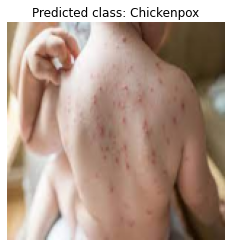

In [38]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

img_path = 'Monkeypox Skin Image Dataset/Chickenpox/chickenpox1.png'
img = cv2.imread(img_path)
img = cv2.resize(img, (150, 150))
img_array = np.array(img)

img_array = img_array.reshape(1, 150, 150, 3)

predictions = model.predict(img_array)

predicted_index = np.argmax(predictions)

labels = ['Chickenpox', 'Measles', 'Monkeypox', 'Normal']

predicted_class = labels[predicted_index]
print(f'Predicted class: {predicted_class}')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f'Predicted class: {predicted_class}')
plt.axis('off')
plt.show()

              precision    recall  f1-score   support

  Chickenpox       0.22      0.29      0.25         7
     Measles       0.60      0.23      0.33        13
   Monkeypox       0.51      0.79      0.62        28
      Normal       0.70      0.48      0.57        29

    accuracy                           0.53        77
   macro avg       0.51      0.45      0.44        77
weighted avg       0.57      0.53      0.52        77

F1 Score: 0.5196


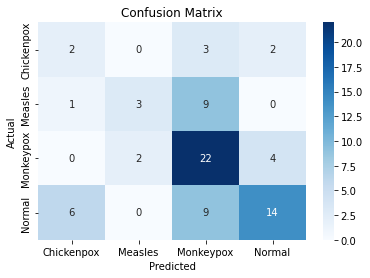

In [39]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained your model
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predictions from one-hot encoding to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert y_test back from one-hot encoding to class labels
y_test_classes = np.argmax(y_test, axis=1)

# Classification report
print(classification_report(y_test_classes, y_pred_classes, target_names=labels))

# F1 score
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
print(f'F1 Score: {f1:.4f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()